# Проект для сети фитнес-центров «Культурист-датасаентист»

# Описание проекта
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. В рамках данного анализа был проведен исследовательский анализ данных(EDA) с целью выяснить какие параметры влияют на отток клиентов; была построена модель прогнозирования оттока клиентов и обучена двумя способами: 
- методом логистической регрессии и случайным лесом; 
- выполнена класеризация клиентов с целью выявления склонных к оттоку и надежных групп клиентов. 

Цель данной работы: провести анализ электронных анкет и подготовить план действий по удержанию клиентов сети.

**Описание данных**
*Данные клиента за предыдущий до проверки факта оттока месяц:*
- `gender` — пол;
- `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
- `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- `Phone` — наличие контактного телефона;
- `Age` — возраст;
- `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).

*Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:*
- `Contract_period` — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
- `Group_visits` — факт посещения групповых занятий;
- `Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;
- `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
- `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- `Churn` — факт оттока в текущем месяце.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предподоготовка-данных." data-toc-modified-id="Загрузка-и-предподоготовка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предподоготовка данных.</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Изучение-и-проверка-данных" data-toc-modified-id="Изучение-и-проверка-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучение и проверка данных</a></span></li><li><span><a href="#Анализ-средних-значений-показателей" data-toc-modified-id="Анализ-средних-значений-показателей-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ средних значений показателей</a></span></li><li><span><a href="#График-распределения-признаков" data-toc-modified-id="График-распределения-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>График распределения признаков</a></span></li><li><span><a href="#Матрица-корелляций" data-toc-modified-id="Матрица-корелляций-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Матрица корелляций</a></span></li></ul></li><li><span><a href="#Построение-модели-прогнозирования-оттока-пользователей" data-toc-modified-id="Построение-модели-прогнозирования-оттока-пользователей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение модели прогнозирования оттока пользователей</a></span><ul class="toc-item"><li><span><a href="#Выделение-обучающей-и-валидационной-выборок" data-toc-modified-id="Выделение-обучающей-и-валидационной-выборок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выделение обучающей и валидационной выборок</a></span></li><li><span><a href="#Модель-построенная-способом-логистической-регрессии" data-toc-modified-id="Модель-построенная-способом-логистической-регрессии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель построенная способом логистической регрессии</a></span></li><li><span><a href="#Модель-построенная-способом-случайного-леса" data-toc-modified-id="Модель-построенная-способом-случайного-леса-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель построенная способом случайного леса</a></span></li><li><span><a href="#Оценка-метрик-и-сравнение-моделей" data-toc-modified-id="Оценка-метрик-и-сравнение-моделей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка метрик и сравнение моделей</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизация-данных" data-toc-modified-id="Стандартизация-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Стандартизация данных</a></span></li><li><span><a href="#Построение-матрицы-расстояний-и-дендрограммы" data-toc-modified-id="Построение-матрицы-расстояний-и-дендрограммы-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Построение матрицы расстояний и дендрограммы</a></span></li><li><span><a href="#Обучение-модели-кластеризации-и-прогноз-кластеров-клиентов" data-toc-modified-id="Обучение-модели-кластеризации-и-прогноз-кластеров-клиентов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение модели кластеризации и прогноз кластеров клиентов</a></span></li><li><span><a href="#Анализ-распределения-признаков-для-кластеров" data-toc-modified-id="Анализ-распределения-признаков-для-кластеров-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ распределения признаков для кластеров</a></span></li><li><span><a href="#Расчёт-и-анализ-долей-оттока-для-кластеров" data-toc-modified-id="Расчёт-и-анализ-долей-оттока-для-кластеров-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Расчёт и анализ долей оттока для кластеров</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><strong>Подготовка данных</strong></a></span></li><li><span><a href="#*Исследовательский-анализ-данных" data-toc-modified-id="*Исследовательский-анализ-данных-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><em>*Исследовательский анализ данных</em></a></span></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span><strong>Модель прогнозирования оттока клиентов</strong></a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span><strong>Кластеризация клиентов</strong></a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span><strong>Рекомендации</strong></a></span></li></ul></li></ul></div>

##  Загрузка и предподоготовка данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,silhouette_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
import itertools
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def info(data):
# функция выводит информаци по загруженному датефрейму    

    print('Обзор загруженных данных')
    display(data.head(5))
    print()
    data.info()
    print()
    print()
    print('Размер датасета')
    print(data.shape)
    print()
    print('Пропуски')
    display(data.isnull().sum())               
    print()           
    print('Количество полных дубликатов:', data.duplicated().sum())

In [3]:
data=pd.read_csv('/datasets/gym_churn.csv')
info(data)

Обзор загруженных данных


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   floa

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


Количество полных дубликатов: 0


По изученным данным делаю вывод, что у нас наичистейшие данные: 
   - пропусков нет 
   - типы данных во всех колонках соответсвующие, кроме колонки `month_to_end_contract`
   - Размер датасета: 4000 строк и 14 колонок 
   - Дубликатов не обнаружено
   
Преведем название столбцов в нижний регистр и переведем в числовой формат столбец "month_to_end_conract" (данные с информацией о сроке до окончания текущего действующего абонемента)? а также переведем некоторые столбцы в булевой тип данных. 

In [4]:
cols = data.columns.str.lower().tolist()  # список всех столбцов
data.columns = cols # передаем список названия столбцов в исходную таблицу
data['month_to_end_contract'] = data['month_to_end_contract'].astype('int')
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,0


In [5]:
data[['gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']] = \
            data[['gender','near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']].astype('bool')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   bool   
 1   near_location                      4000 non-null   bool   
 2   partner                            4000 non-null   bool   
 3   promo_friends                      4000 non-null   bool   
 4   phone                              4000 non-null   bool   
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   bool   
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

**Выводы из полученных результатов по предобработке данных:**
1. Данные чистые, нет дубликатов, пропусков, выбросов (минимальное и максимальные значиение соответсвуют бинарным показателям 0 и 1).
2. У нас имеется исходная информация о данных пользователя за предыдущий до проверки факта оттока месяц, информация на основе журнала посещений, покупок, а также информация о текущем статусе абонемента клиента.
3.  Данные представлены в виде таблицы, включающей в себя 4 000 строк и 14 столбцов.



## Исследовательский анализ данных (EDA)
### Изучение и проверка данных


In [6]:
data.describe()

,contract_period,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,4.681250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052
std,4.549706,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906
min,1.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003
50%,1.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574
75%,6.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336
max,12.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783


**По данной таблице мы видим, что:**

1. Средний возраст клиентов 29 лет.
2. Выручка от прочих услуг фитнес центра (`avg_additional_charges_total`) по медиане (136,22) по средей (146,94)
3. Средняя длительность действующего абонемента составляет 4-5 месяцев. При этом есть перекос в данных: для большинства срок действующего абонемента равен 1 месяцу.
4. В среднем клиенты посещают "зал" 2 раза в неделю (в текущем и предыдущем месяцах).
5. Большинство клиентов задерживаются в зале не дольше 3 месяцев, об этом нам свидетельсвует описание столбца `lifetime`
6.  У нас имеются данные о мужчинах и женщинах, которые обозначаются 0 и 1. При этом в выборке их равное количество (так как выборка имеет чётное число данных, средняя близка к 0,5, а медианное значение равно 1).
7. В таблице указаны данные о людях, живущих рядом и вдали от фитнес-центра. Категории обозначаются 0 и 1. При этом в выборке больше тех, кто живёт или работает рядом (так как средняя близка к 0,85, а первый квартиль равен 1).
8. Поговорим о людях, которые приобрели или не приобрели первый абонемент по акции "Приведи друга". Категории обозначаются 0 и 1. При этом в выборке больше тех, кто пришёл НЕ по акции (так как средняя близка к 0,3, а медиана равна 0).
9. В выборке больше тех, кто предоставлял контактную информацию.
10. У нас есть данные о клиентах, которые посещают групповые занятия (значение 1) или не посещают (значение 0). При этом в выборке чуть больше тех, кто не посещает такие занятия (средняя близка к 0,4, а медиана равна 0).
11. Также, исходя из полученных данных, мы можем сделать вывод, что те, кто продолжают (значение 0) пользоваться услугами центра больше, чем тех, кто ушел (значение 1). Средняя близка к 0,3, а медиана равна 0.
### Анализ средних значений показателей


In [7]:
data.groupby('churn').mean().T

churn,False,True
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


- *По полу* у нас имеется примерно равное количество человек разного пола в двух группах.
- По *близости к фитнес-центру* в группе, которая лояльна к фитнес-центру чуть больше людей, которые живут или работают поблизости, чем тех, кто находится в отдалённости.
- Есть различия в оттоке между теми, кто является *сотрудником компании-партнёра клуба*. Среди тех, кто остался примерно половина и тех, кто связан с партнёрами, и тех, кто не связан, с небольшим преобладанием первых. Но из тех, кто ушёл в отток, больше клиентов, не связанных с компанией-партнёром.
- В обеих группах больше людей, которые приобрели первый абонемент не по *промо-акции "Приведи друга"*. Но среди тех, кто остался, пришедших по промо-акции больше.
- Нет различий между группами в наличии *контактного телефона клиентов*.
- Длительность действующего абонемента по оставшимся пользователям в среднем около 5-6 месяцев, а по ушедшим - 1-2 месяца. Это говорит о том, что купившие длительный абонемент с большей неохотой уйдут в отток, чем те, у кого он действует на короткий срок.
- *Посещение групповых занятий* по выделенным группам также отличается: среди оставшихся клиентов распределение посещающих такие занятия и непосещающих примерно равномерно (вторых чуть больше); но среди тех, кто ушёл в отток, непосещающих групповые занятия значительно больше, чем тех, кто их посещает.
- В группе лояльных фитнес-центру людей *средний возраст* составляет около 30 лет, а среди уходящих - около 27 лет. То есть вторая группа чуть младше.
- Средняя выручка от других услуг фитнес-центра между группами разнится на 43 ден.ед. (в группе лояльных она выше, чем в группе уходящих).
- В среднем *срок до окончания действующего абонемента* у людей, ушедших в отток около 1-2 месяцев, а у оставшихся клиентов - около 5 месяцев. Это снова указывает на то, что уходят в большей степени те, у кого длительность оставшегося абонемента невысока.
- *Время с момента первого обращения* для уходящих в отток равно 1 месяцу, а для тех, кто остался, близко к 5 месяцам. Таким образом, лояльные первые месяцы клиенты, скорее всего, не уйдут в отток после длительного периода пользования услугами фитнес-центра.
- *Средняя частота посещений* в неделю за время действия абонемента в группах не сильно отличается. Лояльные клиенты в среднем посещают центр 2 раза в неделю, а ушедшие - от 1 до 2.
- Разница между группами в *средней частоте посещений* в неделю за месяц также не сильно высока: не ушедшие в отток клиенты в среднем посещали фитнес-клуб 2 раза в неделю, а ушедшие в отток - 1 раз в неделю.

### График распределения признаков
Для удобства разобьем признаки по типу "bool" и не "bool".

In [8]:
bool_features = [] 
dig_features = []

for col in (data.columns.tolist()):
    if data[col].dtype == 'bool':
        bool_features.append(col)
    else:
        dig_features.append(col)
bool_features.remove('churn')

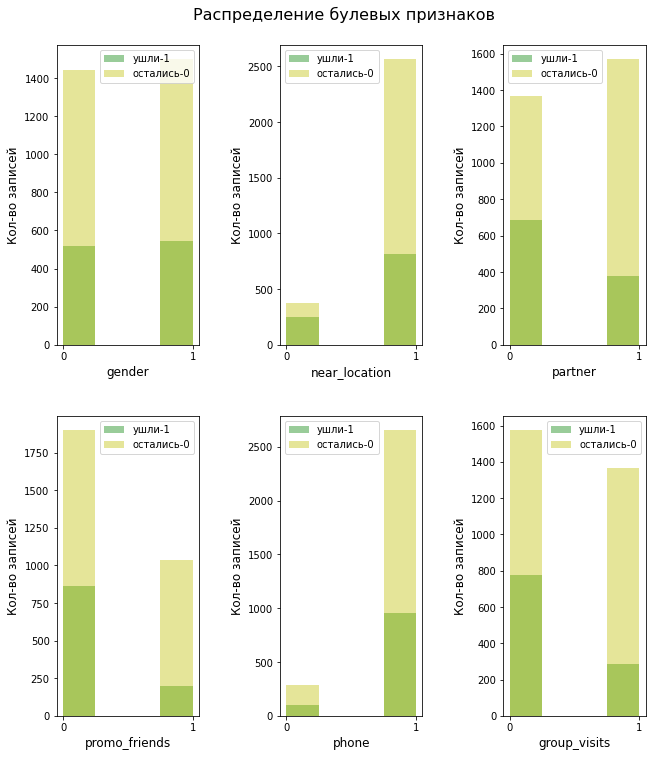

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10,11))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение булевых признаков', fontsize=16)
for feature in bool_features:
    ax = axes_list.pop(0)
    sns.distplot(data.query('churn == 1')[feature].astype(int), bins=4, ax=ax, kde=False, color='g',label='ушли-1')
    sns.distplot(data.query('churn == 0')[feature].astype(int), bins=4, ax=ax, kde=False, color='y',label='остались-0')
    ax.set_xticks([0,1])
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel('Кол-во записей', fontsize=12)
    ax.legend()
plt.show()

Теперь построим распределение осальных признаков

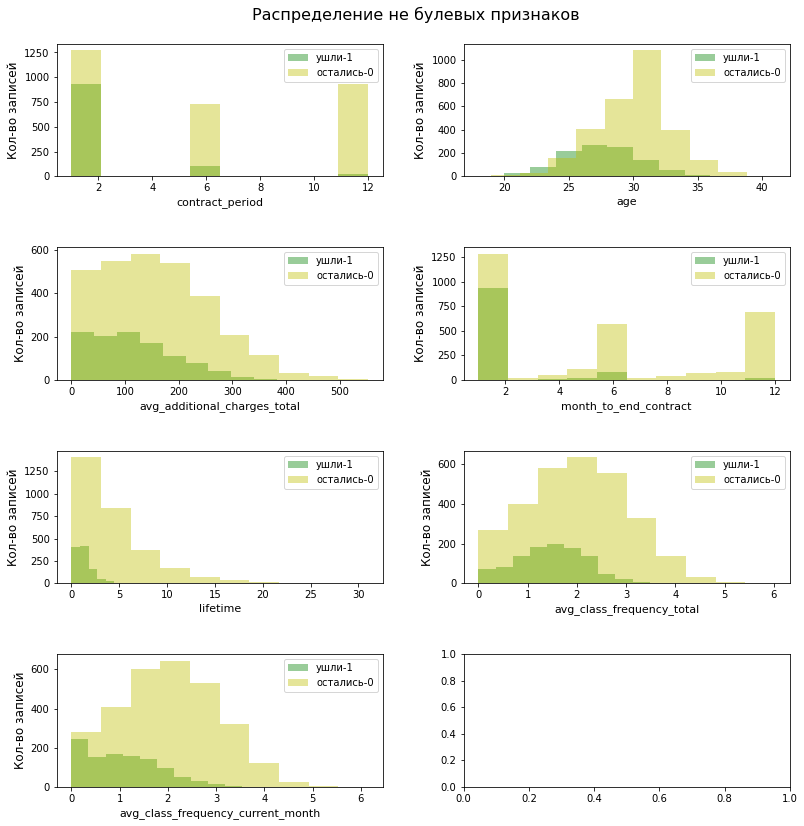

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,12))
axes_list = [item for sublist in axes for item in sublist]
fig.tight_layout(pad=5.0)
fig.suptitle('Распределение не булевых признаков', fontsize=16)
for feature in dig_features:
    ax = axes_list.pop(0)
    sns.distplot(data.query('churn == 1')[feature], bins=10, ax=ax, kde=False, color='g',label='ушли-1')
    sns.distplot(data.query('churn == 0')[feature], bins=10, ax=ax, kde=False, color='y',label='остались-0')
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Кол-во записей', fontsize=12)
    ax.legend()
plt.show()

1. По полу, близости к фитнес-центру, наличию контактного телефона обе группы имеют схожее равномерное распределение.
2. В группе лояльных клиентов число имеющих отношение к компании-партнёра сотрудников явно больше, чем среди тех, кто уходит в отток. Различия в распределении групп по посещению групповых занятий такие же, как и в распределениях по принадлежности к компании-партнёру.
3. Среди тех, кто остался, по промо-акции "Приведи друга" клиентов немного больше, но распределения схожи.
4. Лояльных клиентов, приобретающих абонемент на 1 месяц больше всего, меньше их сроком на год, и наименьшее количество клиентов - на 6 месяцев. А для ушедших в отток 1 месяц - самый популярный, затем - 6 месяцев (с очень низким числом абонементов), и практически нет абонементов на 12 месяцев. Различия в распределении групп по сроку до окончания действующего абонемента такие же, как и в распределениях по длительности абонемента.
5. По среднему возрасту обе группы имеют нормальное распределение, но датасет лояльных клиентов немного смещён вправо, а датасет ушедших клиентов - влево.
6. Распределение средней выручки от других услуг фитнес-центра для обоих датасетов смещено влево с большим смещением для ушедших людей. То есть те, кто уходит, практически ничего не тратят на дополнительные услуги в фитнес-центре.
7. Распределение времени с момента первого обращения для обоих групп похоже на распределение Пуассона. Но для ушедших в отток клиентов оно сильно смещено влево, практически не имея значения в более высоких значениях, а для лояльных клиентов принимает более высокие значения.
8. Распределение для средней частоты посещений в неделю за время действия абонемента в обоих группах является нормальным. 

### Матрица корелляций


In [11]:
correlation = data.corr()
correlation

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


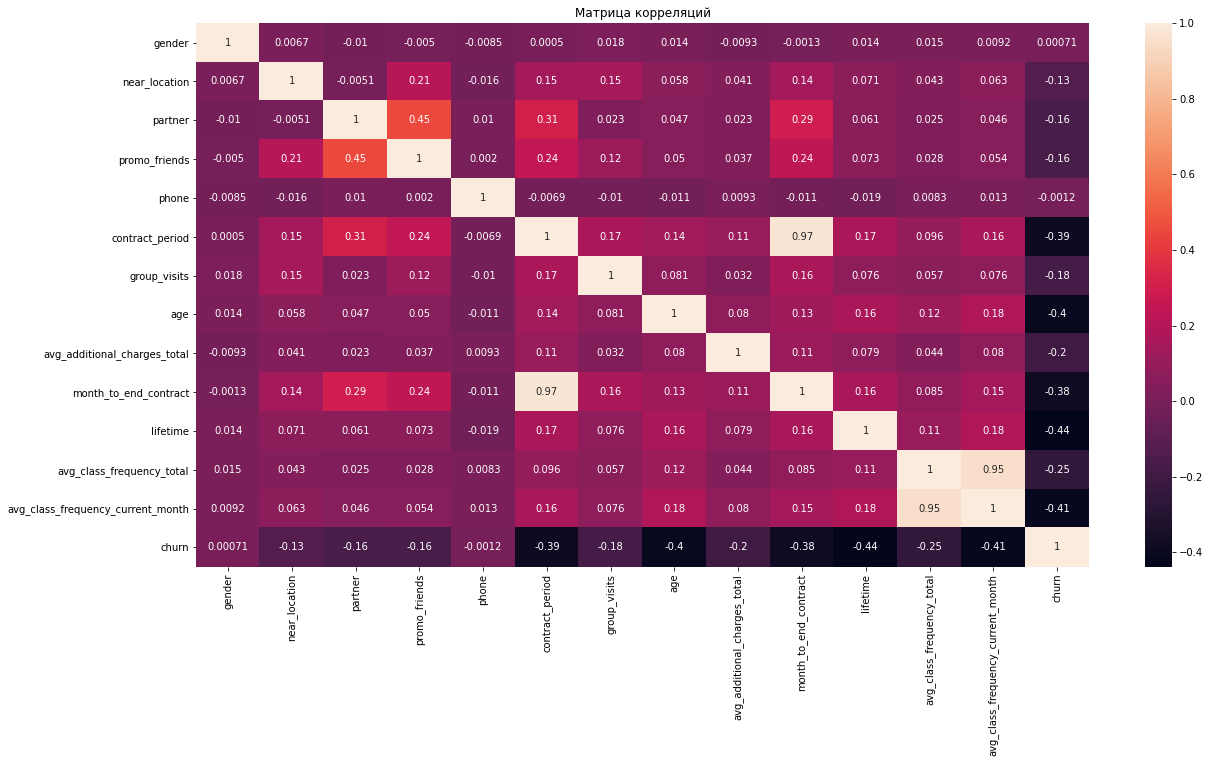

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.title('Матрица корреляций')
plt.show()

Из графика корреляции видно, что больше всего на лояльность и отток клиентов влияют следующие признаки:

- период аббонемента(0,39)
- возраст клиентов(0,4)
- через сколько закончится аббонемент(0,38)
- время прошедшее с первого посещения(0,44)
- количество занятий в неделю(0,41)

**Также надо отметить очень сильную корреляцию пар признаков, которую надо будет учесть в моделях линейной регрессии:**
   Для того, чтобы такие признаки не доминировали над остальными переменными при обучении, удалим из модели month_to_end_contract и avg_class_frequency_total.

In [13]:
data = data.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

**ВЫВОД:**
В ходе EDA анализа было проделано и установлено:
1. Отток клиентов. В выборке больше тех, кто продолжает пользоваться услугами (средняя близка к 0,3, а медиана равна 0).
2. Пол клиентов. У нас имеются данные о мужчинах и женщинах. При этом в выборке их равное количество (средняя близка к 0,5, а медианное значение равно 1). 
3. Близость к фитнес-центру. В выборке больше тех, кто живёт или работает рядом (так как средняя близка к 0,85, а первый квартиль равен 1). А в группе, которая лояльна к фитнес-центру, чуть больше человек, которые живут или работают поблизости, хотя, распределения по этому признаку для лояльных и нелояльных клиентов не сильно отличаются друг от друга.
4. Сотрудники компании-партнёра. Находятся в равной пропорции (средняя близка к 0,5).  Из тех, кто ушёл в отток, больше клиентов, не связанных с компанией-партнёром. Это же выражено и в распределении соответствующих данных.
5. Промо-акция. Больше людей, которые приобрели первый абонемент не по промо-акции "Приведи друга", но среди тех, кто остался, пришедших по промо-акции больше, хотя распределения у лояльных клиентов и ушедших близки.
6. Контактный телефон. Больше тех, для кого представлена контактная информация (так как средняя близка к 0,9, а четвёртый квартиль равен 1) для обоих категорий: лояльных и нелояльных клиентов (распределения схожи).
7. Возраст клиентов. Средний возраст равен 29 годам. При этом люди разного возраста выбраны достаточно равномерно. Распределение для лояльных клиентов немного смещено вправо, а для ушедших клиентов - влево. Так, в группе лояльных фитнес-центру людей средний возраст составляет около 30 лет, а среди уходящих - около 27 лет. 
8. Время с первого обращения. Среднее время с момента первого обращения составляет 3 месяца. Распределение времени с момента первого обращения для ушедших в отток клиентов сильно смещено влево, практически не имея значения в более высоких значениях, а для лояльных клиентов принимает более высокие значения. Таким образом, среднее время с момента первого обращения для уходящих в отток составило 1 месяц, а для тех, кто остался, близко к 5 месяцам. 
9. Длительность абонемента. Имеет срок в 1, 6 и 12 месяцев. Средняя длительность действующего абонемента составляет 4-5 месяцев. При этом есть перекос в данных: для большинства срок действующего абонемента равен 1 месяцу. Длительность действующего абонемента по оставшимся пользователям в среднем около 5-6 месяцев, а по ушедшим - 1-2 месяца. Это говорит о том, что купившие длительный абонемент с большей неохотой уйдут в отток, чем те, у кого он действует на короткий срок.
10. Время до окончания абонемента. В среднем это значение около 4 месяцев. При этом больше половины всей выборки - это люди, до конца абонементов которых остался 1 месяц. Различия в распределении групп (лояльных и нелояльных клиентов) по сроку до окончания действующего абонемента такие же, как и в распределениях по длительности абонемента. В среднем срок до окончания действующего абонемента у людей, ушедших в отток, около 1-2 месяцев, а у оставшихся клиентов - около 5 месяцев. Это снова указывает на то, что уходят в большей степени те, у кого длительность оставшегося абонемента невысока.
11. Групповые занятия. В выборке чуть больше тех, кто не посещает такие занятия. При этом среди лояльных клиентов распределение посещающих такие занятия и непосещающих примерно равномерно; но среди тех, кто ушёл в отток, непосещающих групповые занятия значительно больше, чем тех, кто их посещает.
12. Частота посещений за весь срок. В среднем это значение составляет около 2 раз в неделю. При этом выборка равномерная. Распределение для средней частоты посещений в неделю за время действия абонемента в обоих группах является нормальным. Лояльные клиенты, в среднем, посещают центр 2 раза в неделю, а ушедшие - от 1 до 2.
13. Частота посещений за месяц. В среднем это значение составляет около 2 раз в неделю. Распределения и средние значения схожи с распределениями аналогичного показателя за весь срок абонемента.
14. Выручка от прочих услуг. Выручка от прочих услуг фитнес-центра с клиента составила от 0,15 до 552,6 ден.ед. Средняя выручка от других услуг фитнес-центра между группами разнится на 43 ден.ед. (в группе лояльных она выше, чем в группе уходящих). Распределение средней выручки от других услуг фитнес-центра для обоих датасетов смещено влево с большим смещением для ушедших людей. То есть те, кто уходит, стараются минимизировать затраты на дополнительные услуги в фитнес-центре.



15. На основе корреляции мы видим, что такие признаки как пол и наличие контактного телефона почти не влияют на конечный показатель оттока. Все остальные показатели имеют обратное влияние: слабое, либо чуть более сильное. Также отметим, что имеется сильная связь между показателями длительности абонемента и количеством месяцев до конца абонемента. Это говорит о том, что в выборке представлены клиенты, которые отобраны на определённом этапе покупки абонемента. Скорее всего, в начале действия абонемента. Также наблюдается сильная связь между средней частотой посщений в неделю с начала пользования услугами и за предыдущий месяц. Это говорит о другой зависимости: скорее всего, клиенты посещают фитнес-центр примерно одинаковое число раз в неделю вне зависимости от того, сколько они пользуются услугами центра.

## Построение модели прогнозирования оттока пользователей
### Выделение обучающей и валидационной выборок

In [14]:
# Разделим данные на признаки (матрица x) и целевую переменную (y)
x = data.drop('churn', axis = 1)
y = data['churn']

# Разделим выборку на обучающую и валидационную в соотношении 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Cтандартизируем данные
scaler = StandardScaler()
scaler.fit(x_train)
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

### Модель построенная способом логистической регрессии


In [15]:
# Зададим алгоритм для модели
logreg_model = LogisticRegression(random_state=0)

# Обучим модель
logreg_model.fit(x_train_st, y_train)

# Воспользуемся обученной моделью, чтобы сделать прогнозы
logreg_predictions = logreg_model.predict(x_test_st)
logreg_probabilities = logreg_model.predict_proba(x_test_st)[:,1]


###  Модель построенная способом случайного леса

In [16]:
# Зададим алгоритм для модели
randfor_model = RandomForestClassifier(random_state=0)

# Обучим модель
randfor_model.fit(x_train_st, y_train)

# Воспользуемся обученной моделью, чтобы сделать прогнозы
randfor_predictions = randfor_model.predict(x_test_st)
randfor_probabilities = randfor_model.predict_proba(x_test_st)[:,1]

### Оценка метрик и сравнение моделей

In [17]:
# Определим функцию, которая будет выводить наши метрики
def print_metrics(y_true, y_pred, y_proba, model_name):
    print("Метрики для модели "+model_name)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))
    
    
# Рассчитаем метрики для модели логистической регрессии
print_metrics(y_test, logreg_predictions, logreg_probabilities, 'логистической регрессии')
print()
# Рассчитаем метрики для модели случайного леса
print_metrics(y_test, randfor_predictions, randfor_probabilities, 'случайного леса')

Метрики для модели логистической регрессии
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.84
	F1: 0.84
	ROC_AUC: 0.97

Метрики для модели случайного леса
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.77
	F1: 0.81
	ROC_AUC: 0.96


Обе модели достаточно хорошо способны делать прогноз. Однако, модель логистической регрессии подходит больше по всем показателям: доле правильных ответов (accuracy), точности (precision), полноте (recall), агрерующей метрике F1_score и наиболее точной метрике оценки качества классификатора ROC_AUC.
Метрики лучшей модели:

- Accuracy: точность прогнозирования 0,92
- Precision: доля правильных ответов в пределах класса 0.85
- Recall: количесто исстино положительных результатов 0.84
- F1: обобщеная оценка метрик Precision и Recall 0.84
- ROC_AUC: 0.97 показатель говорит о том, что модель очень точно производит бинарную классификацию объектов.


Результаты оценки модели, разными метриками, дали высокие результаты, что свидетельствует о возможности использования её в дальнейшией аналитической работе.

## Кластеризация клиентов
### Стандартизация данных


In [18]:
# Зададим "стандартизатор"
scaler = StandardScaler()

# Стандартизируем данные
x_st = scaler.fit_transform(x)

### Построение матрицы расстояний и дендрограммы


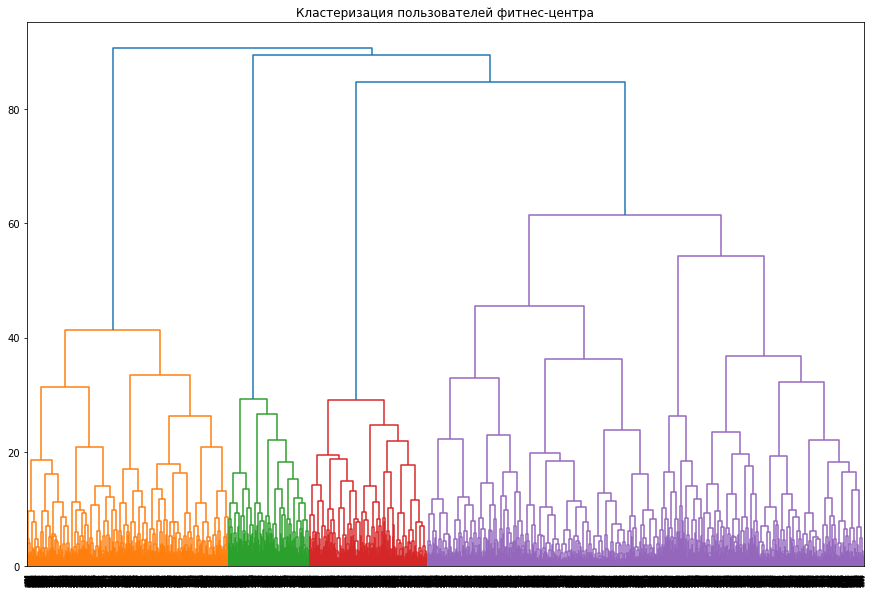

In [19]:
# Сохраним матрицу расстояний
links = linkage(x_st, method = 'ward')

# Построим дендрограмму
plt.figure(figsize=(15, 10))
plt.title('Кластеризация пользователей фитнес-центра')
dendrogram(links, orientation='top')
plt.show()


### Обучение модели кластеризации и прогноз кластеров клиентов
Было принято решение для прогноза кластеров клиентов использовать пять кластеров. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [20]:
# Зададим модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

# Спрогнозируем кластеры для наблюдений
labels = km.fit_predict(x_st)

# Сохраним метки кластера в поле нашего датасета
data['cluster_km'] = labels

# Переименуем названия кластеров
data.loc[data['cluster_km']==0, 'cluster_km'] = 'cluster_1'
data.loc[data['cluster_km']==1, 'cluster_km'] = 'cluster_2'
data.loc[data['cluster_km']==2, 'cluster_km'] = 'cluster_3'
data.loc[data['cluster_km']==3, 'cluster_km'] = 'cluster_4'
data.loc[data['cluster_km']==4, 'cluster_km'] = 'cluster_5'

# Выведем средние значения признаков для кластеров
data.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,
cluster_1,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520,0.119797
cluster_2,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
cluster_3,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319,0.563910
cluster_4,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220,0.014896
cluster_5,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


При взгляде на таблицу чётко отделяемые группы выделить можно по ряду признаков. Однако, для более наглядного разделения требуется построить распределение для каждого признака по кластерам.

### Анализ распределения признаков для кластеров
Для анализа распределения признаков в кластерах построим столбчатые диаграммы для логических и дискретных переменных (пол, близость к фитнес-центру, принадлежность к компании-партнёру, первое посещение по акции "Приведи друга", наличие контакта, длительность абонемента, посещение групповых занятий, отток) и боксплоты для непрерывных переменных (возраст, время с момента первого обращения, показатели средней частоты посещений в неделю за месяц, выручка от других услуг).

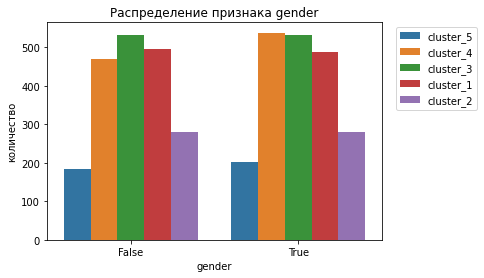

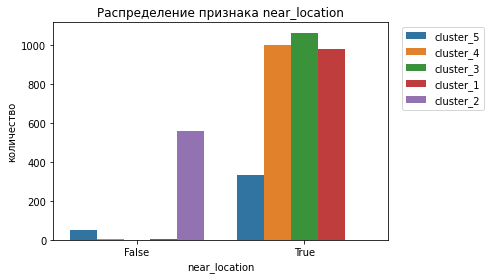

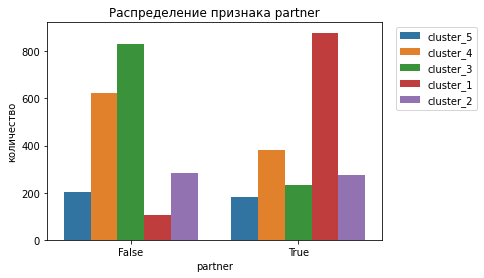

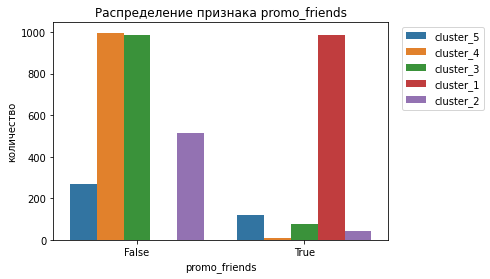

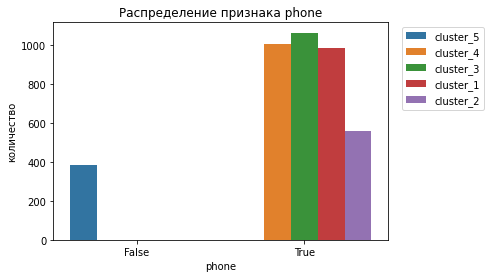

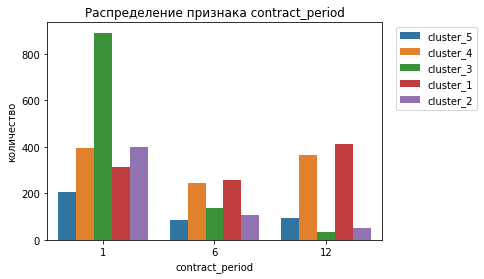

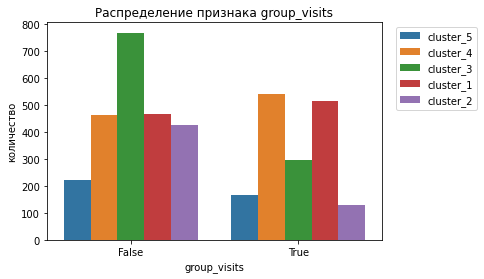

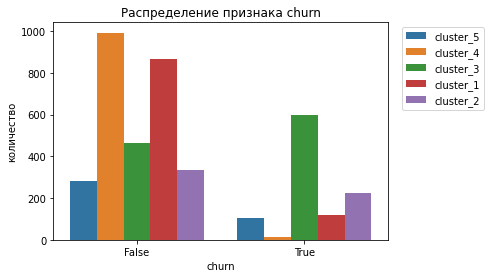

In [21]:
# Построим график для логических и дискретных величин
log_discr_values = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'churn']
fig, ax = plt.subplots()
for column in log_discr_values:
    plt.title("Распределение признака "+column)
    sns.countplot(data=data, x=column, hue='cluster_km')
    plt.xlabel(column)
    plt.ylabel("количество")
    plt.legend(bbox_to_anchor=(1.3, 1))
    plt.show()

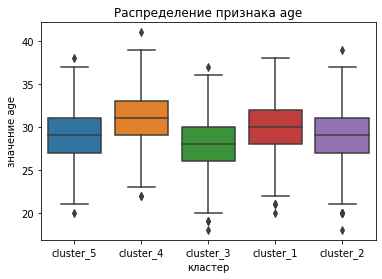

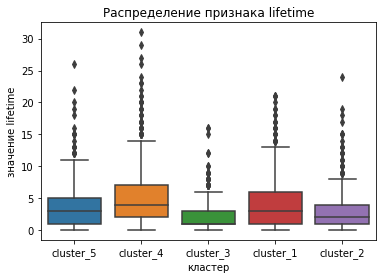

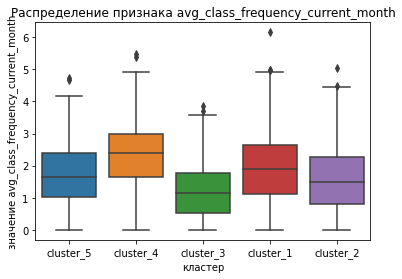

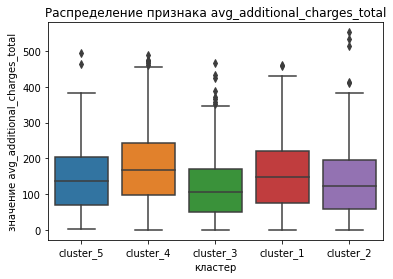

In [22]:
# Построим график для непрерывных величин
cont_values = ['age', 'lifetime', 'avg_class_frequency_current_month', 'avg_additional_charges_total']
fig, ax = plt.subplots()
for column in cont_values:
    plt.title("Распределение признака "+column)
    sns.boxplot(x='cluster_km', y=column, data=data)
    plt.xlabel('кластер')
    plt.ylabel('значение '+column)
    plt.show()

**Кластер 1 характеризуется:**

- приблизительно равным распределением между мужчинами и женщинами;
- клиентами, которые находятся поблизости от фитнес-центра;
- клиентами, большинство из которых (около 90%) пришли от компаний-партнёров;
- клиентами, которые пришли по промо-акции от друзей;
- наличием контактных данных;
- абонементом на 1, 6 и 12 месяцев с преобладанием абонементов на 12 месяцев;
- с примерно равным посещением по групповым занятиям;
- средним возрастом около 30 лет;
- высоким уровнем дополнительных оплат;
- длинным сроком от начала пользования услугами;
- посещением около 2 раза в неделю.

**Кластер 2 характеризуется:**

- приблизительно равным распределением между мужчинами и женщинами;
- клиентами, живущими или работающими вдали от фитнес-центра;
- примерно равным числом посетителей от компаний-партнёров и обычных посетителей;
- клиентами, большинство из которых (около 90%) пришло не по промо-акции от друзей;
- наличием контактных данных;
- абонементом на 1, 6 и 12 месяцев с примерно равным распределением и небольшим преобладанием 1 месяц;
- клиентами, большая часть которых не посещает групповые занятия;
- средним возрастом около 28 лет;
- средним уровнем дополнительных оплат;
- средним сроком от начала пользования услугами;
- посещением около 1,5 раз в неделю.

**Кластер 3 характеризуется:**

- приблизительно равным распределением между мужчинами и женщинами;
- клиентами, большинство из которых находится вблизи от фитнес-центра;
- клиентами, большинство из которых (около 70%) пришли НЕ от компаний-партнёров;
- клиентами, большинство из которых (около 70%) пришло НЕ по промо-акции от друзей;
- наличием контактных данных;
- абонементом на 1, 6 и 12 месяцев с большим преобладанием 1 месяца;
- клиентами, около 70% которых не посещает групповые занятия;
- средним возрастом в 27,5 лет;
- низким уровнем дополнительных оплат;
- коротким сроком от начала пользования услугами;
- посещением около 1 раз в неделю.

**Кластер 4 характеризуется:**

- чуть большим числом людей одного пола, по сравнению с другим;
- клиентами, живущими или работающими недалеко от финес-центра;
- клиентами, большинство из которых (около 65%) пришли не от компаний-партнёров, 
- клиентами, большинство из которых пришло НЕ по промо-акции от друзей;
- наличием контактных данных;
- абонементом на 1, 6 и 12 месяцев с примерно равным распределением по месяцам;
- клиентами, с примерно равным посещением групповых занятий;
- средним возрастом около 31 лет;
- высоким уровнем дополнительных оплат;
- длинным сроком от начала пользования услугами;
- посещением около 2,5 раз в неделю.

**Кластер 5 характеризуется:**

- приблизительно равным распределением между мужчинами и женщинами;
- клиентами, которые находятся вблизи от фитнес-центра;
- примерно равным числом посетителей от компаний-партнёров и обычных посетителей;
- 65% клиентов, которые пришли НЕ по промо-акции от друзей;
- отсутствием контактных данных;
- абонементом на 1, 6 и 12 месяцев с преобладанием на 1 месяц;
- клиентами, около половины которых НЕ посещает групповые занятия;
- средним возрастом около 29 лет;
- очень высоким уровнем дополнительных оплат;
- среднем сроком от начала пользования услугами;
- посещением около 1,5 раз в неделю.

### Расчёт и анализ долей оттока для кластеров


In [23]:
# Для каждого полученного кластера посчитаем долю оттока
(data
     .groupby('cluster_km')['churn']
     .mean()
     .reset_index()
     .sort_values(by='churn', ascending=False)
     .reset_index(drop=True))

,cluster_km,churn
0,cluster_3,0.563910
1,cluster_2,0.403226
2,cluster_5,0.266839
3,cluster_1,0.119797
4,cluster_4,0.014896


Третий кластер больше всего склонен к оттоку: доля составляет около 56%. Второй кластер характеризуется долей оттока в 40%, а пятый - около 27%. Первый и четвертый кластеры (доля оттока 12% и 2%, соответственно) являются самыми надёжными.

## Общий вывод
Было проведено исследование данных о клиентах фитнес-центра «Культурист-датасаентист». 

### **Подготовка данных**
- пропусков нет
- типы данных во всех колонках соответсвующие, кроме колонки month_to_end_contract
- Размер датасета: 4000 строк и 14 колонок
- Дубликатов не обнаружено
- данные переведены в нужный тип

### **Исследовательский анализ данных*

- *По полу* у нас имеется примерно равное количество человек разного пола в двух группах.
- По *близости к фитнес-центру* в группе, которая лояльна к фитнес-центру чуть больше людей, которые живут или работают поблизости, чем тех, кто находится в отдалённости.
- Есть различия в оттоке между теми, кто является *сотрудником компании-партнёра клуба*. Среди тех, кто остался примерно половина и тех, кто связан с партнёрами, и тех, кто не связан, с небольшим преобладанием первых. Но из тех, кто ушёл в отток, больше клиентов, не связанных с компанией-партнёром.
- В обеих группах больше людей, которые приобрели первый абонемент не по *промо-акции "Приведи друга"*. Но среди тех, кто остался, пришедших по промо-акции больше.
- Нет различий между группами в наличии *контактного телефона клиентов*.
- Длительность действующего абонемента по оставшимся пользователям в среднем около 5-6 месяцев, а по ушедшим - 1-2 месяца. Это говорит о том, что купившие длительный абонемент с большей неохотой уйдут в отток, чем те, у кого он действует на короткий срок.
- *Посещение групповых занятий* по выделенным группам также отличается: среди оставшихся клиентов распределение посещающих такие занятия и непосещающих примерно равномерно (вторых чуть больше); но среди тех, кто ушёл в отток, непосещающих групповые занятия значительно больше, чем тех, кто их посещает.
- В группе лояльных фитнес-центру людей *средний возраст* составляет около 30 лет, а среди уходящих - около 27 лет. То есть вторая группа чуть младше.
- Средняя выручка от других услуг фитнес-центра между группами разнится на 43 ден.ед. (в группе лояльных она выше, чем в группе уходящих).
- В среднем *срок до окончания действующего абонемента* у людей, ушедших в отток около 1-2 месяцев, а у оставшихся клиентов - около 5 месяцев. Это снова указывает на то, что уходят в большей степени те, у кого длительность оставшегося абонемента невысока.
- *Время с момента первого обращения* для уходящих в отток равно 1 месяцу, а для тех, кто остался, близко к 5 месяцам. Таким образом, лояльные первые месяцы клиенты, скорее всего, не уйдут в отток после длительного периода пользования услугами фитнес-центра.
- *Средняя частота посещений* в неделю за время действия абонемента в группах не сильно отличается. Лояльные клиенты в среднем посещают центр 2 раза в неделю, а ушедшие - от 1 до 2.
- Разница между группами в *средней частоте посещений* в неделю за месяц также не сильно высока: не ушедшие в отток клиенты в среднем посещали фитнес-клуб 2 раза в неделю, а ушедшие в отток - 1 раз в неделю.

### **Модель прогнозирования оттока клиентов**

Основные метрики полученной лучшей модели, построенных алгоритмом логистической регрессии следующие: 

- Accuracy: точность прогнозирования 0,92
- Precision: доля правильных ответов в пределах класса 0.85
- Recall: количесто исстино положительных результатов 0.84
- F1: обобщеная оценка метрик Precision и Recall 0.84
- ROC_AUC: 0.97 показатель говорит о том, что модель очень точно производит бинарную классификацию объектов. 
  -Модель логистической регрессии подходит больше по всем показателям: доле правильных ответов (accuracy), точности (precision), полноте (recall), агрерующей метрике F1 и наиболее точной метрике оценки качества классификатора ROC_AUC.

- По дендрограмме было высказано предположение о наличии четырёх кластеров в данных. Однако, было принято решение для прогноза кластеров клиентов использовать пять кластеров в модели K-Means.

### **Кластеризация клиентов**

Анализ средних значений и распределений признаков для кластеров показал, что выделенные кластеры имеют следующие отличительные характеристики.

**Кластер 1 характеризуется:**

- приблизительно равным распределением между мужчинами и женщинами;
- клиентами, которые находятся поблизости от фитнес-центра;
- клиентами, большинство из которых (около 90%) пришли от компаний-партнёров;
- клиентами, которые пришли по промо-акции от друзей;
- наличием контактных данных;
- абонементом на 1, 6 и 12 месяцев с преобладанием абонементов на 12 месяцев;
- с примерно равным посещением по групповым занятиям;
- средним возрастом около 30 лет;
- высоким уровнем дополнительных оплат;
- длинным сроком от начала пользования услугами;
- посещением около 2 раза в неделю.

**Кластер 2 характеризуется:**

- приблизительно равным распределением между мужчинами и женщинами;
- клиентами, живущими или работающими вдали от фитнес-центра;
- примерно равным числом посетителей от компаний-партнёров и обычных посетителей;
- клиентами, большинство из которых (около 90%) пришло не по промо-акции от друзей;
- наличием контактных данных;
- абонементом на 1, 6 и 12 месяцев с примерно равным распределением и небольшим преобладанием 1 месяц;
- клиентами, большая часть которых не посещает групповые занятия;
- средним возрастом около 28 лет;
- средним уровнем дополнительных оплат;
- средним сроком от начала пользования услугами;
- посещением около 1,5 раз в неделю.

**Кластер 3 характеризуется:**

- приблизительно равным распределением между мужчинами и женщинами;
- клиентами, большинство из которых находится вблизи от фитнес-центра;
- клиентами, большинство из которых (около 70%) пришли НЕ от компаний-партнёров;
- клиентами, большинство из которых (около 70%) пришло НЕ по промо-акции от друзей;
- наличием контактных данных;
- абонементом на 1, 6 и 12 месяцев с большим преобладанием 1 месяца;
- клиентами, около 70% которых не посещает групповые занятия;
- средним возрастом в 27,5 лет;
- низким уровнем дополнительных оплат;
- коротким сроком от начала пользования услугами;
- посещением около 1 раз в неделю.

**Кластер 4 характеризуется:**

- чуть большим числом людей одного пола, по сравнению с другим;
- клиентами, живущими или работающими недалеко от финес-центра;
- клиентами, большинство из которых (около 65%) пришли не от компаний-партнёров, 
- клиентами, большинство из которых пришло НЕ по промо-акции от друзей;
- наличием контактных данных;
- абонементом на 1, 6 и 12 месяцев с примерно равным распределением по месяцам;
- клиентами, с примерно равным посещением групповых занятий;
- средним возрастом около 31 лет;
- высоким уровнем дополнительных оплат;
- длинным сроком от начала пользования услугами;
- посещением около 2,5 раз в неделю.
- **Самый надежный кластер, с долью оттока менее чем 15%**

**Кластер 5 характеризуется:**

- приблизительно равным распределением между мужчинами и женщинами;
- клиентами, которые находятся вблизи от фитнес-центра;
- примерно равным числом посетителей от компаний-партнёров и обычных посетителей;
- 65% клиентов, которые пришли НЕ по промо-акции от друзей;
- отсутствием контактных данных;
- абонементом на 1, 6 и 12 месяцев с преобладанием на 1 месяц;
- клиентами, около половины которых НЕ посещает групповые занятия;
- средним возрастом около 29 лет;
- очень высоким уровнем дополнительных оплат;
- среднем сроком от начала пользования услугами;
- посещением около 1,5 раз в неделю.

### **Рекомендации**

На основе представленных выводов, предложены следующие рекомендации для стратегии взаимодействия с пользователями сети фитнес-центров «Культурист-датасаентист» и их удержания.

1) Рекомендуется привлечение в фитнес-центр клиентов из близлежащих спальных районах.

2) Рекомендуется отменить проведение акции "Приведи друга" и акций для сотрудников компаний-партнёров - поскольку они не способствует "удержанию" клиентов, а высвободившиеся деньги направить на другие мероприятия (например, реклама  в близлежащих спальных районах).

3) Возможно внедрение и реклама абонементов более длительного срока (9 и 12 месяцев) - поскольку чем дольше времени до окончания абонемента, тем лояльнее клиенты.

4) Поскольку категория с длительными абонементами имеет склонность пользоваться доп. услугами, для них возможно введение специальных скидок и акций по доп услугам.

5) Рекомендуется установить более выгодные цены на длительные абонементы. Например, цена на абонемент на 3 месяца (нужно внедрить абонементы на 3 месяца) ненамного дороже, чем на абонемент на 1 месяц (чтобы покупатель стремился покупать 3 месяца) - это снизит риски оттока клиентов в первые месяцы.

6) Возможно ввести более выгодное продление абонемента для клиентов, покупающих абонемент сроком от 3 месяцев. Например, по окончании абонемента покупка нового тем же сроком - скидка 25%. Подобные скидки окупятся доп услугами, которыми пользуются лояльные клиенты и отменой неэффективных акций.

7) Рекомендуется проводить мониторинг средней частоты посещений фитнес-центра в неделю по клиентам. При обнаружении снижения показателя предлагать клиентам "бонусы" (бесплатная разовая доп услуга, скидки на продление абонемента, одно бесплатное групповое занятие по новому для него направлению и т.п.).